# 0. 安装必要的库，这里已经显示安装好

In [1]:
# !pip install NJmatML
# !pip install matplotlib
# !pip install sklearn
# !pip install scikit-learn
# !pip install pandas 
# !pip install gplearn 
# !pip install imblearn 
# !pip install numpy
# !pip install seaborn
# !pip install xgboost
from NJmatML import dataML 
import warnings
warnings.filterwarnings("ignore")

# 1. file_name打开的文件名可视化pandas数据
#### data是csv倒入时的数据集
#### data_rfe在后面会有，是rfe特征选择后的总数据集
#### t是rfe特征选择后的特征数据
#### target是rfe特征选择后的目标数据

In [2]:
dataML.file_name('2DEformationCleaned.csv') #打开csv并存到data中
# dataML.hist()  #画所有列分布的柱状图，例如potential 在0.3 V最多

     A1 NumberofProtons  A2 NumberofProtons  B NumberofProtons  \
0                     3                   3                 32   
1                    11                  11                 32   
2                    19                  19                 32   
3                    37                  37                 32   
4                    55                  55                 32   
..                  ...                 ...                ...   
300                  19                  19                 29   
301                  19                  19                 26   
302                  19                  19                 12   
303                  19                  19                 25   
304                  19                  19                 28   

     X1 NumberofProtons  X2 NumberofProtons  X3 NumberofProtons  \
0                     9                   9                   9   
1                     9                   9                   9   
2     

# 2. 封装函数特征选择之前heatmap画热图

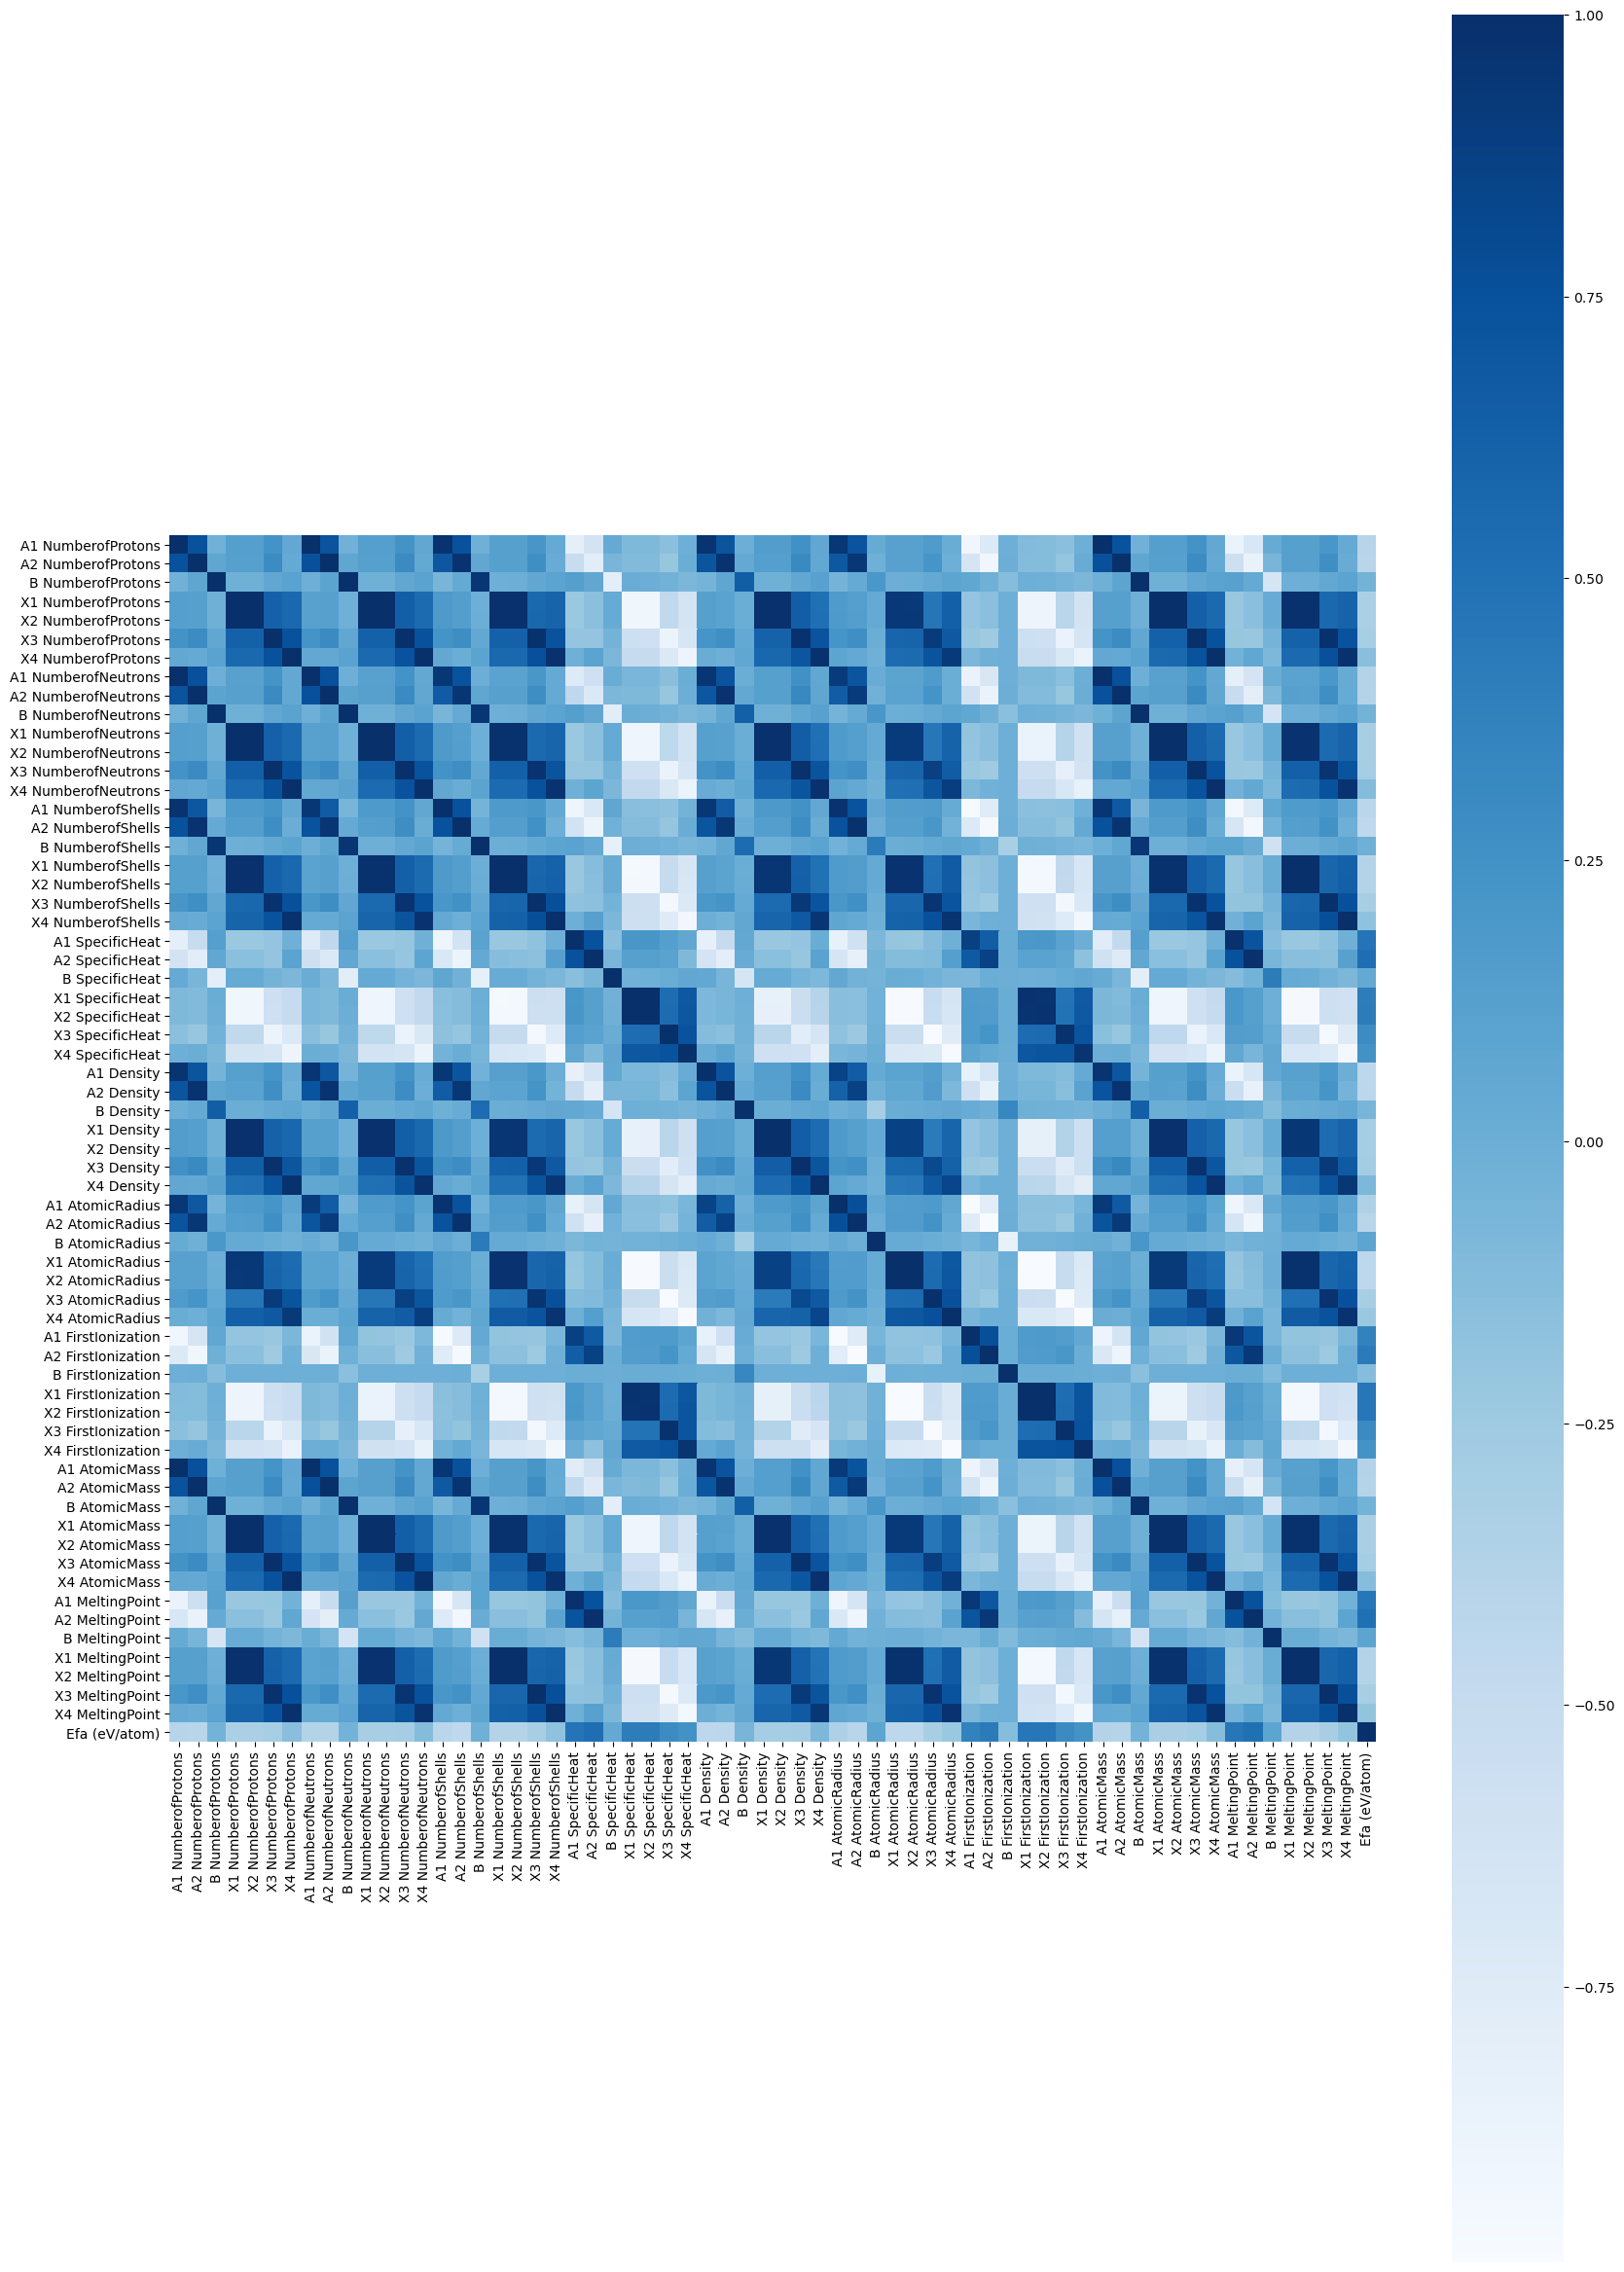

In [3]:
dataML.heatmap_before() #画封装函数特征选择之前heatmap热图

# 3. rfe特征选择

In [4]:
dataML.feature_rfe_select1(20)   #20为希望最后剩余的特征数目，可以自行改变

特征是否被选中：
 [False False  True False False False False False False False False False
  True False False False False False  True  True False False  True False
 False  True False False  True  True  True False False False False False
  True False False  True False False  True  True  True False  True False
  True False  True False False False False False False  True  True False
 False False  True]
获取的数据特征尺寸: (305, 20)
最后的特征s_rfe: ['B NumberofProtons' 'X3 NumberofNeutrons' 'X2 NumberofShells'
 'X3 NumberofShells' 'A2 SpecificHeat' 'X2 SpecificHeat' 'A1 Density'
 'A2 Density' 'B Density' 'A2 AtomicRadius' 'X2 AtomicRadius'
 'A1 FirstIonization' 'A2 FirstIonization' 'B FirstIonization'
 'X2 FirstIonization' 'X4 FirstIonization' 'A2 AtomicMass'
 'A2 MeltingPoint' 'B MeltingPoint' 'X4 MeltingPoint']
目标target:      Efa (eV/atom)
0         0.817268
1         0.468555
2         0.457779
3         0.305243
4         0.080708
..             ...
300      -0.428684
301       0.097022
302      -0.004769


# 4 画rfe特征选择后的热图和pairplot图
## 4.1 画rfe特征选择后的热图

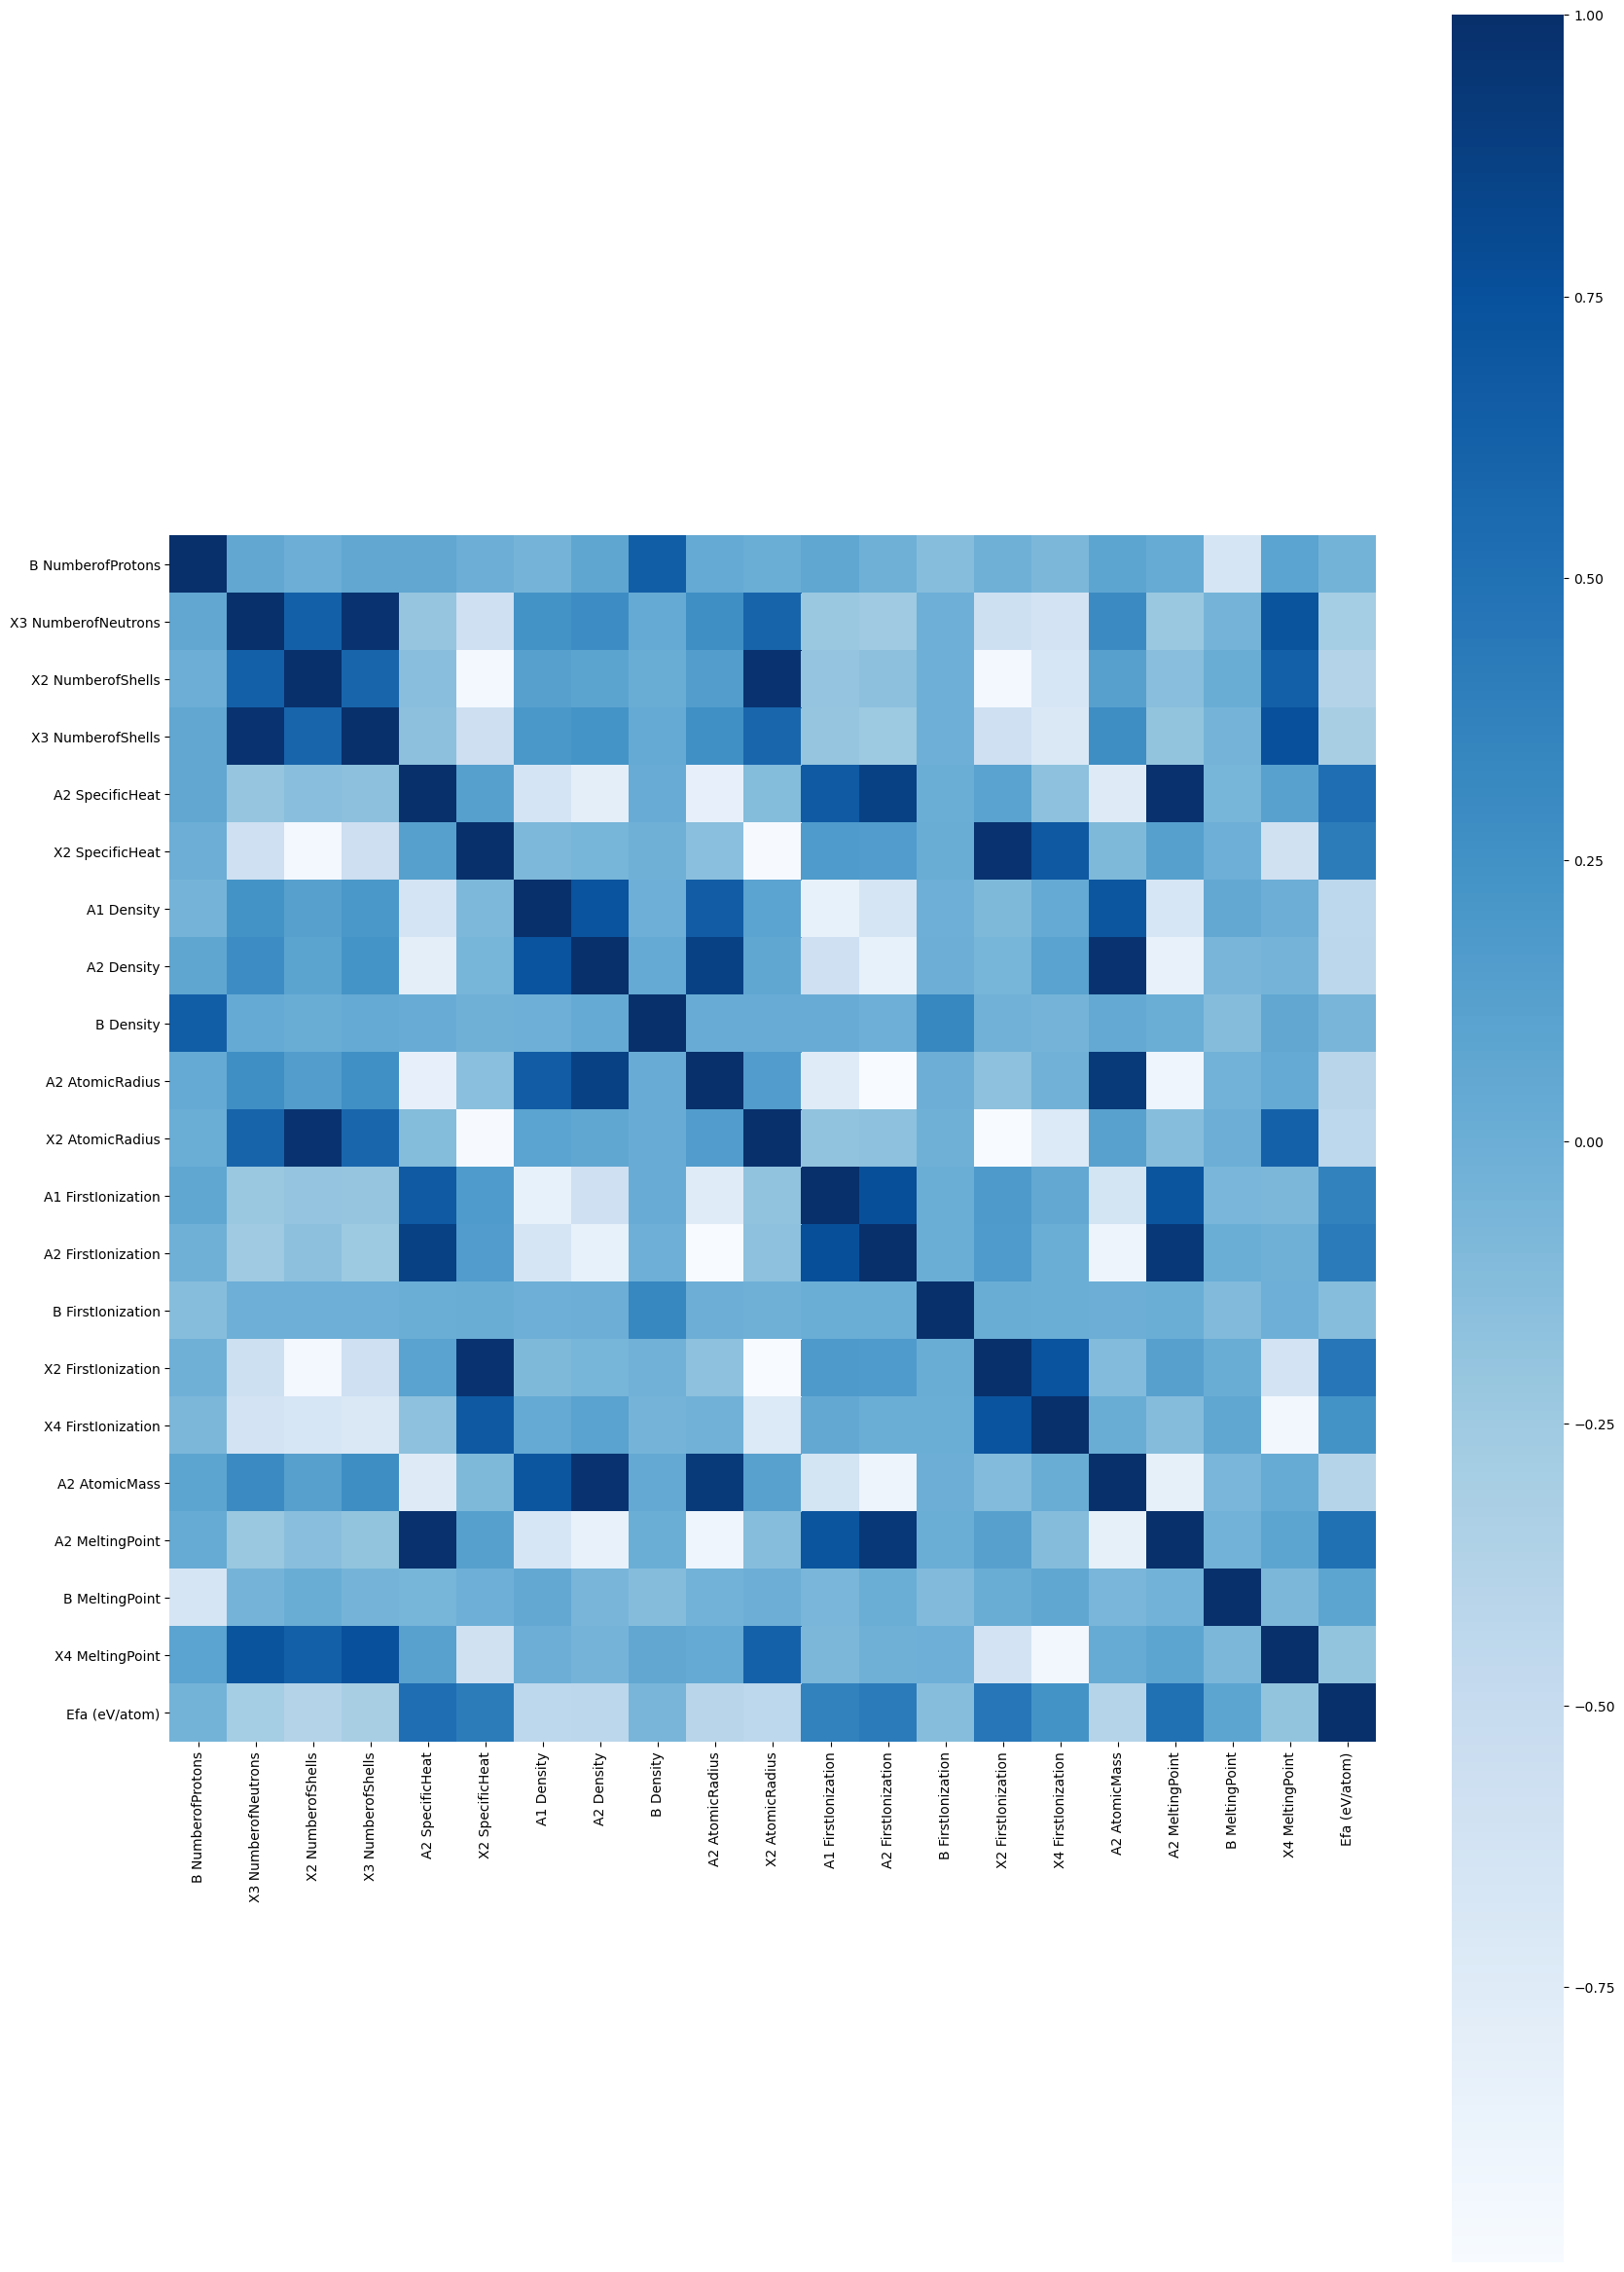

In [5]:
dataML.heatmap_afterRFE() 

In [6]:
#dataML.pairplot_afterRFE()#这里画图需要较长时间，请耐心

这个图可以提取科学信息

正相关还是负相关

# 5 重要性排名（皮尔逊系数）
## 5.1 特征选择之前所有特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
A1 SpecificHeat,0.475211
X2 FirstIonization,0.462445
A1 MeltingPoint,0.459693
...,...
A2 Density,-0.431418
X1 AtomicRadius,-0.436009
A1 Density,-0.437098
X2 AtomicRadius,-0.439406


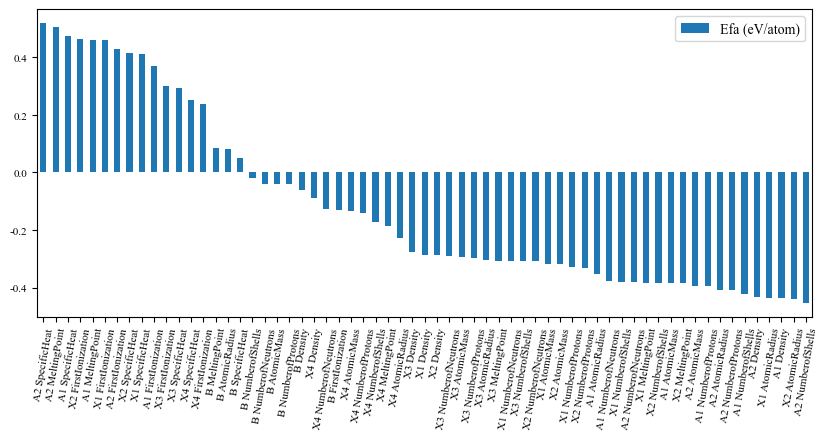

In [7]:
dataML.FeatureImportance_before(80,8,10,4)  #rotation=80, fontsize=8, figure_size_xaxis=10,figure_size_yaxis=4

这个图可以提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

## 5.2 特征选择之后的个别特征的重要性

,Efa (eV/atom)
A2 SpecificHeat,0.518837
A2 MeltingPoint,0.506876
X2 FirstIonization,0.462445
A2 FirstIonization,0.429791
X2 SpecificHeat,0.415926
A1 FirstIonization,0.369538
X4 FirstIonization,0.238356
B MeltingPoint,0.083589
B NumberofProtons,-0.041833
B Density,-0.061085


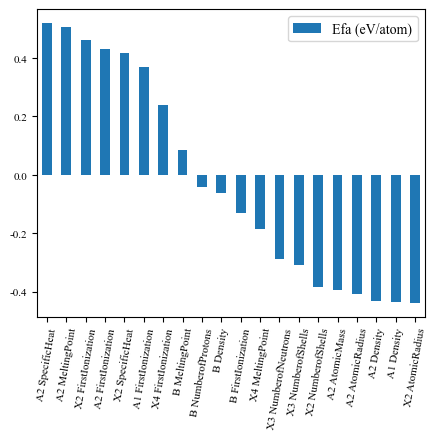

In [8]:
dataML.FeatureImportance_afterRFE(80,12,5,4) #rotation=80, fontsize=12, figure_size_xaxis=5,figure_size_yaxis=4

这个图可以快速提取科学信息：

正相关，负相关，为什么正相关，为什么负相关

重要性排名前几名解释，哪些相关，哪些不相关，为什么相关，为什么不相关

# 6 机器学习建模
## 6.1 xgboost建模和准确率画图
### 6.1.1 xgboost默认超参数建模画图
#### (n_estimators=2000, max_depth=100, eta=0.1, gamma=0,
#### subsample=0.9, colsample_bytree=0.9, learning_rate=0.2)

RMSE: 0.1665375680536411
MAE: 0.10835290559261841
R2: 0.7048465486063791
MSE: 0.027734761573221137


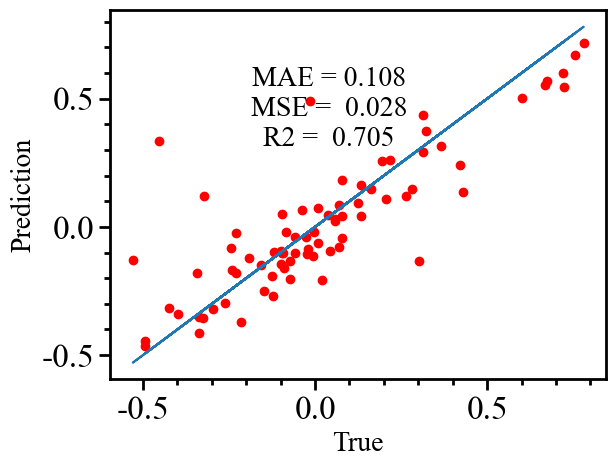

[0.35894593 0.39401376 0.51516007 0.7021937  0.51871221 0.82554864
 0.91045762 0.75659741 0.78567835 0.68752445]


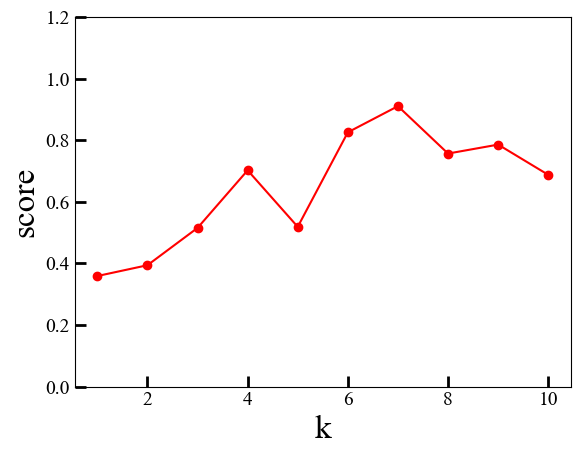

RMSE: 0.000804096872048333
MAE: 0.0005890718214338104
R2: 0.9999939229534915
MSE: 6.465717796379132e-07


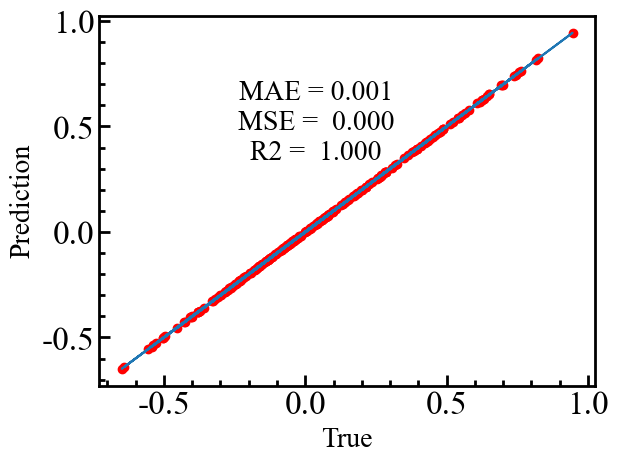

In [9]:
dataML.xgboost_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.1.2 xgboost自己修改超参数, 建模
画图得到拟合图以及交叉验证图
(n_estimators=2000xxx, max_depth=100xxx, eta=0.1xxx, gamma=0xxx,
subsample=0.9xxx, colsample_bytree=0.9xxx, learning_rate=0.2xxx)

RMSE: 0.17722688818676954
MAE: 0.11338145090650058
R2: 0.6657413511006236
MSE: 0.03140936989636571


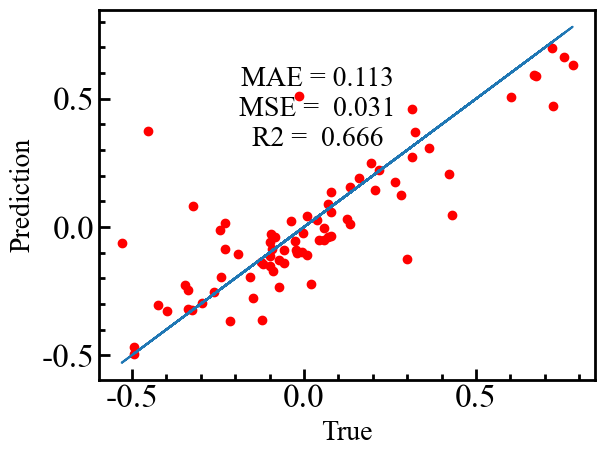

[0.42014851 0.38582937 0.49880522 0.71793085 0.48975636 0.85164024
 0.91929755 0.83621013 0.86521669 0.66342119]


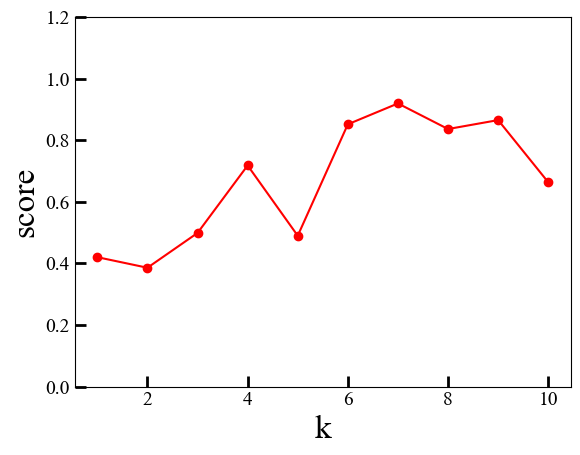

RMSE: 0.0008535735314920928
MAE: 0.0006195061816469873
R2: 0.9999931520955205
MSE: 7.285877736638827e-07


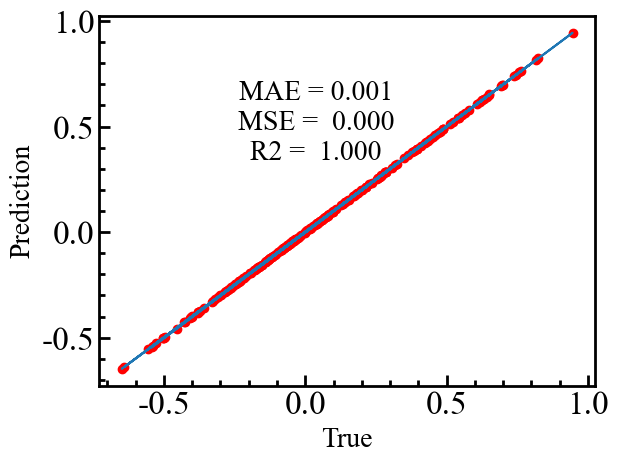

In [10]:
dataML.xgboost_modify(1000,200,0.2,0,0.9,0.8,0.2) #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

#(n_estimators=1000, max_depth=200, eta=0.2, gamma=0, subsample=0.9, colsample_bytree=0.8, learning_rate=0.2)
#这里可以自己更改超参数，play with it, 观察准确率是否提升

第一个拟合图是基于测试集。
RMSE: 0.055163274701856106
MAE: 0.03133570165011043
R2: 0.8083609244543635
MSE: 0.0030429868758324375
上述为误差，相比于真实目标数值还行。
r2越大越好，这里也还行

第二个交叉验证图为10折交叉验证，准确率为不同k的准确率，大致看到大部分score接近1，平均score>0.8甚至>0.9, 因此10折交叉验证准确率还行。这里的score是R2。

### 6.1.3 xgboostRandomSearchCV随机超参数, 建模并观察准确率

In [11]:
# dataML.xgboost_RandomSearchCV() 

#比较慢，尤其是交叉验证，请耐心等待

#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

### 6.1.4 xgboostRandomSearchCV网格搜索（并非随机）寻找最优超参数, 建模并观察准确率

In [12]:
# dataML.xgboost_GridSearchCV() #非常慢，请耐心等待


#  这里暂时设置的参数与RandomSearch一样，后面更能需要更新
#     param_distribs = {
#         'n_estimators': range(80, 200, 4),
#         'max_depth': range(2, 15, 1),
#         'learning_rate': np.linspace(0.01, 2, 20),
#         'subsample': np.linspace(0.7, 0.9, 20),
#         'colsample_bytree': np.linspace(0.5, 0.98, 10),
#         'min_child_weight': range(1, 9, 1)
#          n_iter=300

## 6.2 Random forest 随机森林建模画图
### 6.2.1 Random forest 默认超参数建模画图

RMSE: 0.1850461859890016
MAE: 0.12089690879649351
R2: 0.6355955215309137
MSE: 0.034242090949076175


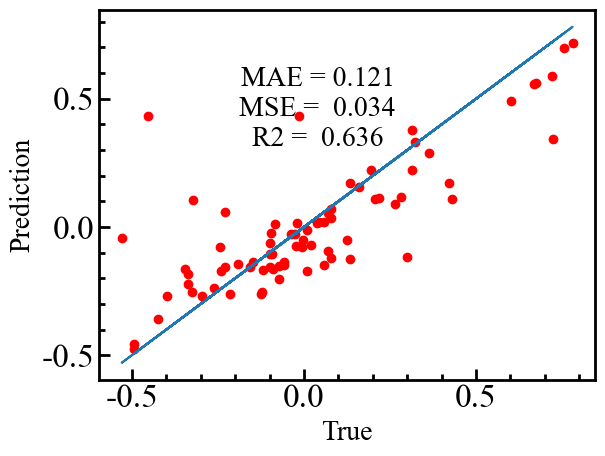

[0.56436634 0.54555065 0.53426185 0.6305218  0.4535302  0.75365056
 0.91184933 0.76923259 0.81226508 0.38821156]


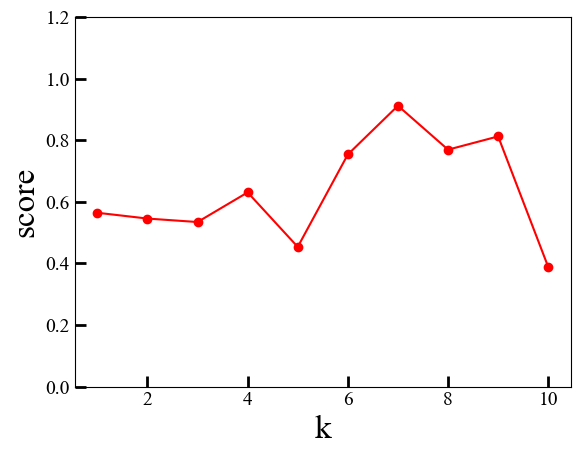

RMSE: 0.06576241113007178
MAE: 0.04521994880653508
R2: 0.9593527404663308
MSE: 0.004324694717640589


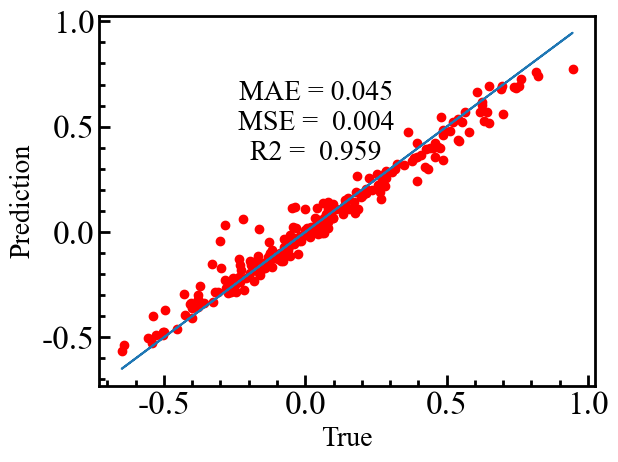

In [11]:
dataML.RandomForest_default() #三个图，第一个图测试集拟合，第二个图交叉验证，第三个图训练集的拟合（没什么用）

### 6.2.2 Random forest 自己修改超参数建模画图

RMSE: 0.18005773570269268
MAE: 0.12244152278701301
R2: 0.6549778333284428
MSE: 0.03242078818638073


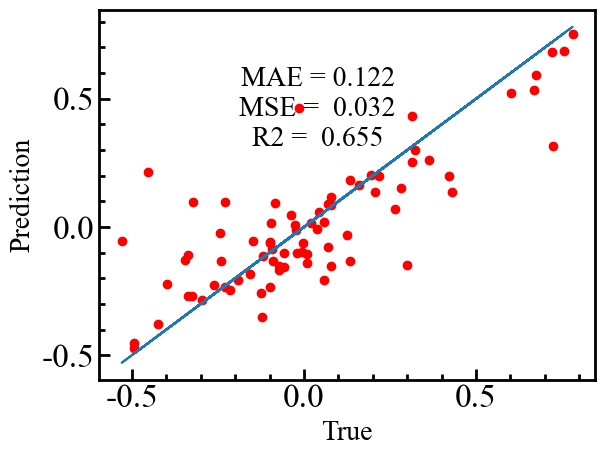

[0.60366533 0.32362054 0.6204772  0.62400699 0.3911161  0.72715072
 0.90025063 0.79269596 0.8000569  0.48998967]


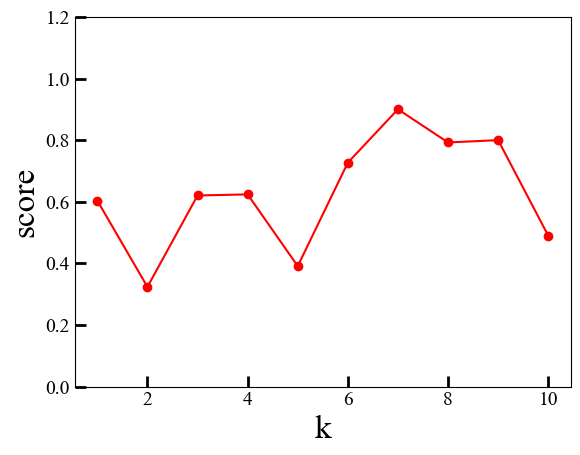

RMSE: 0.07889237175025955
MAE: 0.050376143941228066
R2: 0.9415013505550393
MSE: 0.006224006320381152


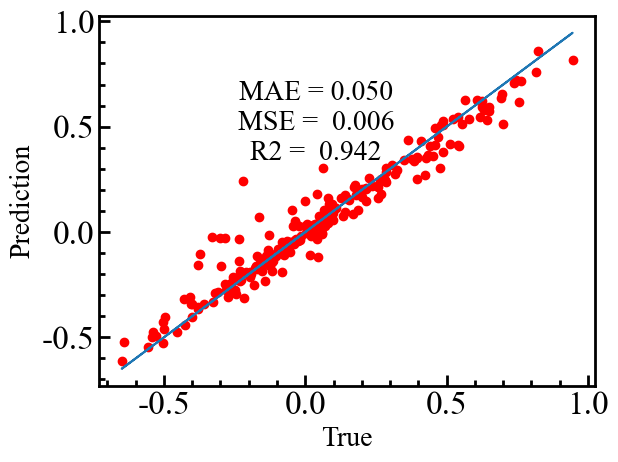

In [12]:
dataML.RandomForest_modify(20, 0.3, 2, 10, 10) # max_depth=20, max_features=0.3, min_samples_split=2, n_estimators=10, random_state=10 可以自己修改

### 6.2.3 Random forest RandomSearchCV 随机搜索超参数建模画图
param_distribs = {'bootstrap': [True, False],
           'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 200, None],
           'max_features': ['auto', 'sqrt'],
           'min_samples_leaf': [1, 2, 4],
           'min_samples_split': [2, 5, 10],
           'n_estimators': [130, 180, 230]}
           
RandomizedSearchCV(clf, param_distribs, n_iter=300, cv=10, scoring='neg_mean_squared_error')

In [15]:
# dataML.RandomForest_RandomSearchCV()  #需要很长时间

## 6.3  Bagging建模画图
### 6.3.1  Bagging 默认建模画图

RMSE: 0.17684423622089435
MAE: 0.11388719237662338
R2: 0.667183193818361
MSE: 0.031273883884551476


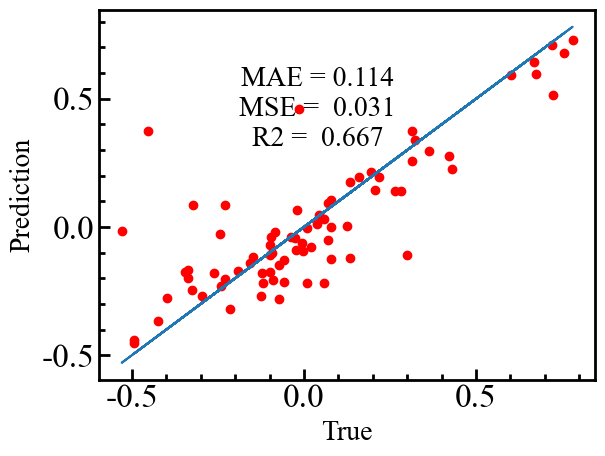

[0.55963475 0.44347606 0.53210974 0.71720853 0.49642405 0.81775009
 0.87245471 0.79318757 0.75466733 0.17813291]


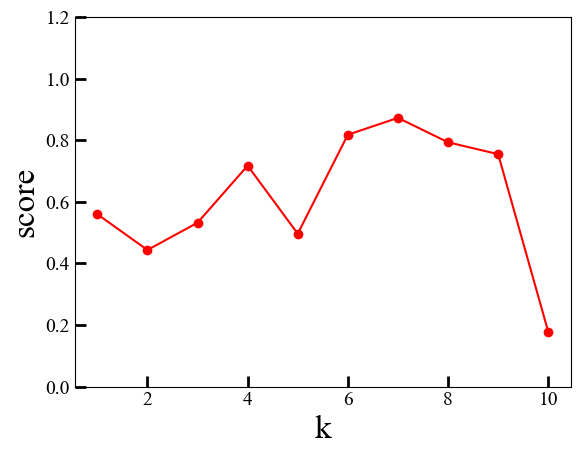

RMSE: 0.07866141466593678
MAE: 0.05147959372061404
R2: 0.9418433583052872
MSE: 0.0061876181572464535


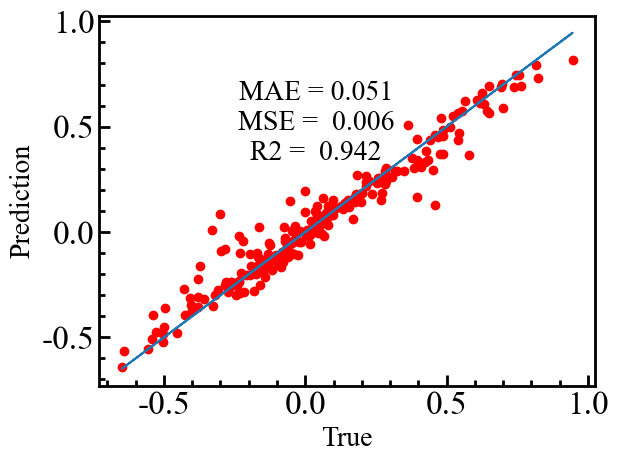

In [13]:
dataML.Bagging_default()

## 6.4  AdaBoost建模画图
### 6.4.1  AdaBoost默认建模画图

RMSE: 0.20714064227852047
MAE: 0.16463651408473384
R2: 0.5433809077513787
MSE: 0.04290724568355798


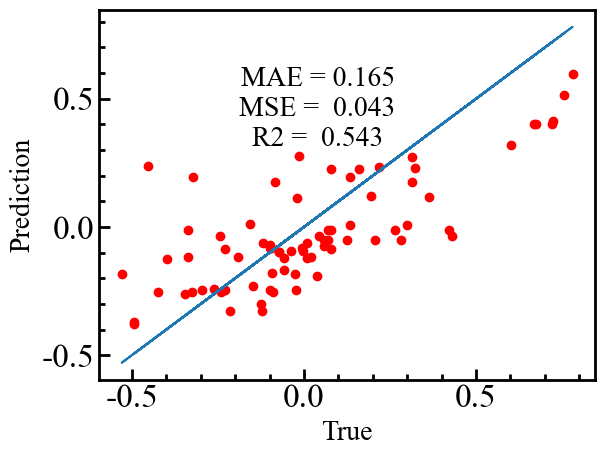

[0.50835855 0.42757512 0.36266021 0.5749578  0.43051475 0.67336222
 0.7870225  0.67207772 0.75034534 0.56258548]


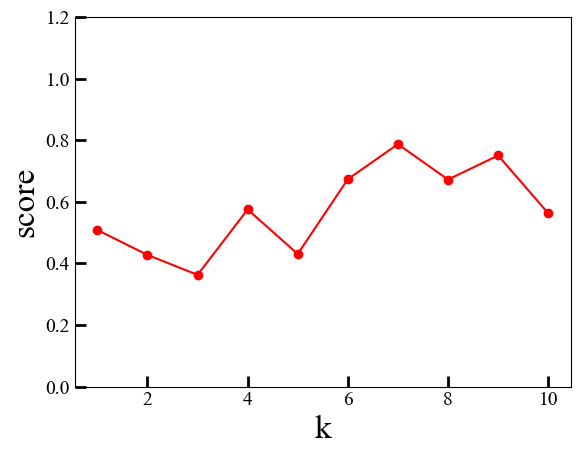

RMSE: 0.16122967438500205
MAE: 0.135428529150614
R2: 0.7556762033457987
MSE: 0.025995007902293782


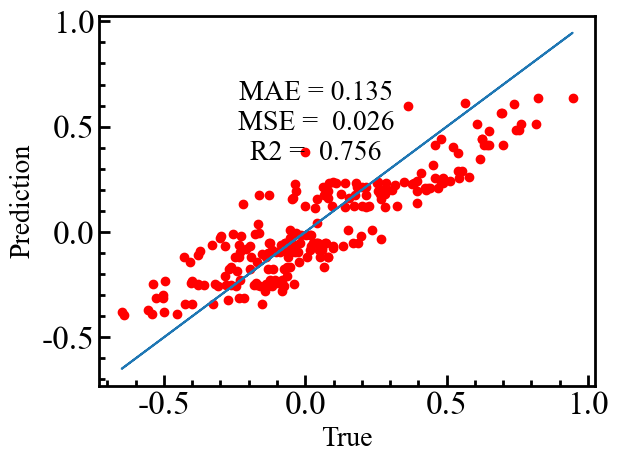

In [14]:
dataML.AdaBoost_default()

## 6.5  GradientBoosting建模画图
### 6.5.1  GradientBoosting默认建模画图

RMSE: 0.18434127156443422
MAE: 0.12347940242415716
R2: 0.6383665562796828
MSE: 0.03398170440199248


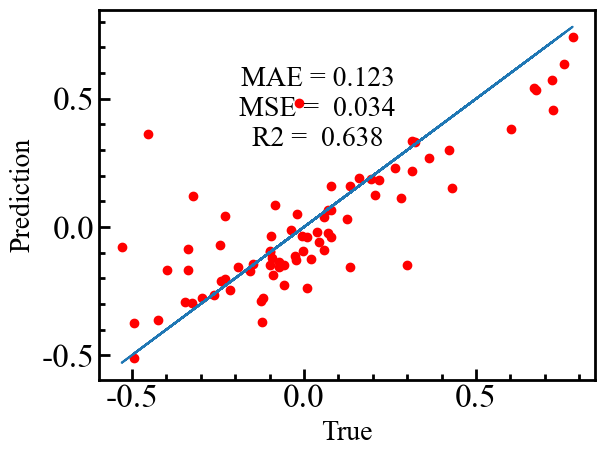

[0.60073858 0.58108872 0.54660579 0.62991369 0.58857625 0.72769742
 0.91982201 0.81361379 0.6948874  0.41951976]


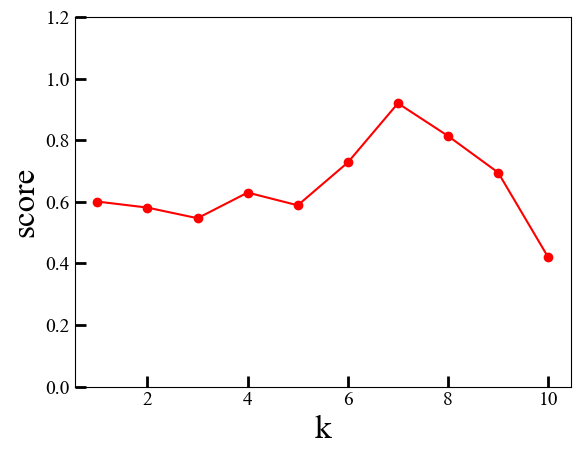

RMSE: 0.09841137373512424
MAE: 0.06932534973910146
R2: 0.9089738020675211
MSE: 0.009684798480434301


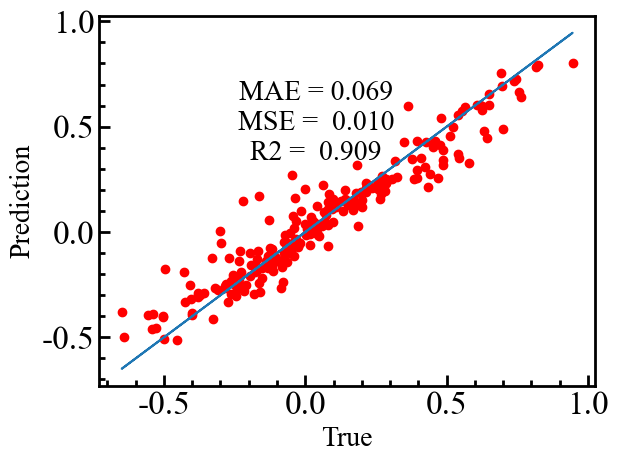

In [15]:
dataML.GradientBoosting_default()

## 6.6 ExtraTree建模画图
### 6.6.1 ExtraTree默认建模画图

RMSE: 0.1861019683342444
MAE: 0.12875510902597403
R2: 0.6314254343940011
MSE: 0.0346339426178801


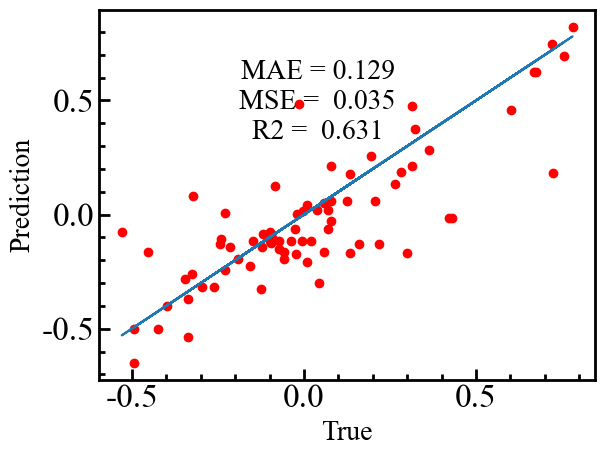

[0.3788157  0.51666885 0.61412436 0.43641895 0.1984279  0.61027091
 0.91437871 0.63390262 0.36223031 0.38752864]


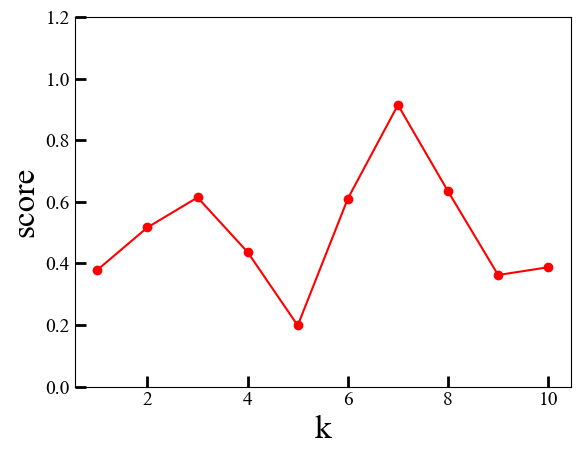

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


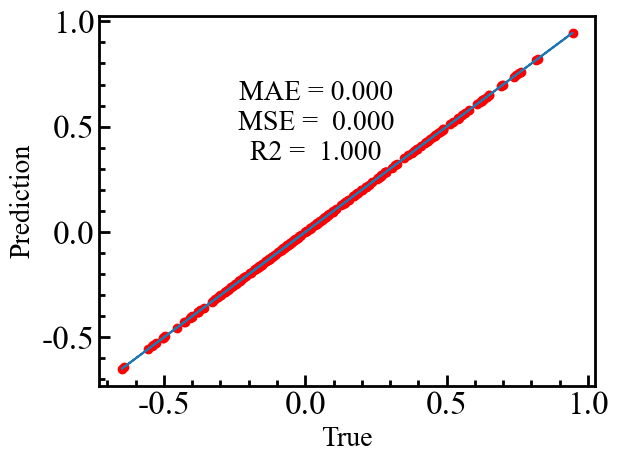

In [16]:
dataML.ExtraTree_default()

## 6.7 svm建模画图
### 6.7.1 svm默认建模画图

RMSE: 0.22353211979997267
MAE: 0.1548914729025812
R2: 0.46825513756244297
MSE: 0.04996660858226934


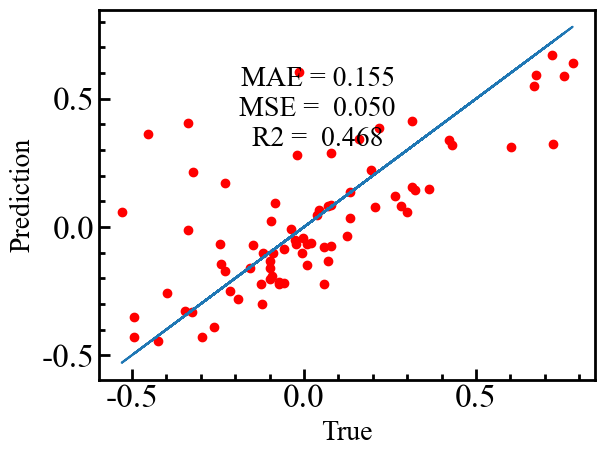

[0.57270563 0.29531619 0.5110566  0.70420854 0.26551293 0.71289856
 0.71782155 0.51047602 0.77962274 0.31219719]


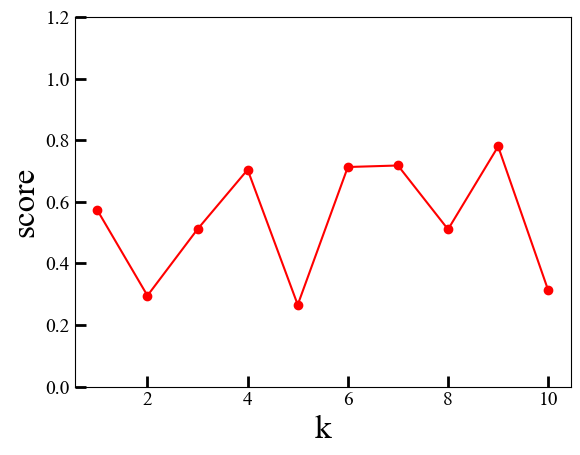

RMSE: 0.1635636083438043
MAE: 0.1114956964984512
R2: 0.7485514240388247
MSE: 0.026753053974445405


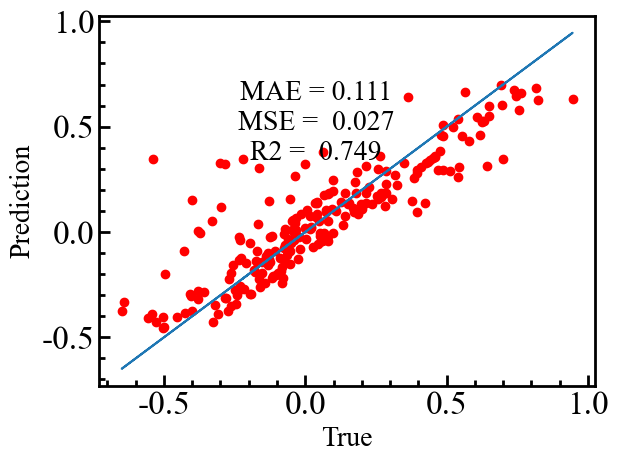

In [17]:
dataML.svm_default()

## 6.8 DecisionTree建模画图
### 6.8.1 DecisionTree默认建模画图

RMSE: 0.20227017089239943
MAE: 0.1298565142727273
R2: 0.5646013159786496
MSE: 0.04091322203284047


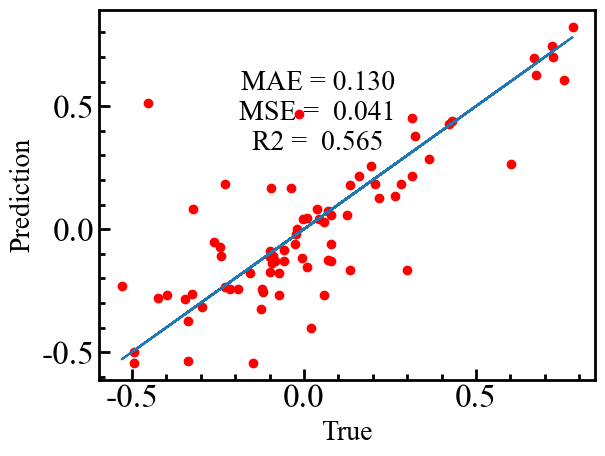

[0.31962552 0.25393539 0.38429934 0.2728426  0.25566382 0.50292325
 0.82085701 0.69737963 0.40799623 0.22957723]


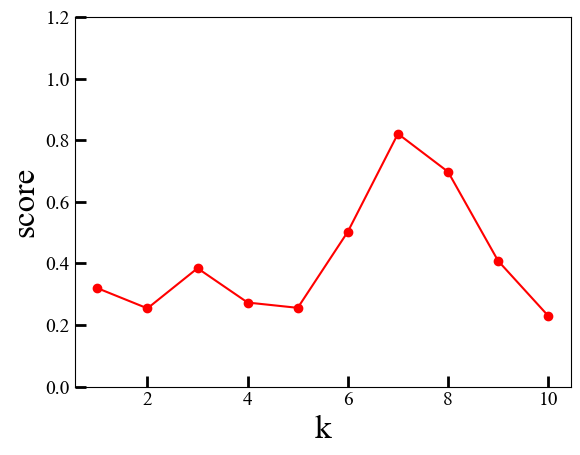

RMSE: 0.0
MAE: 0.0
R2: 1.0
MSE: 0.0


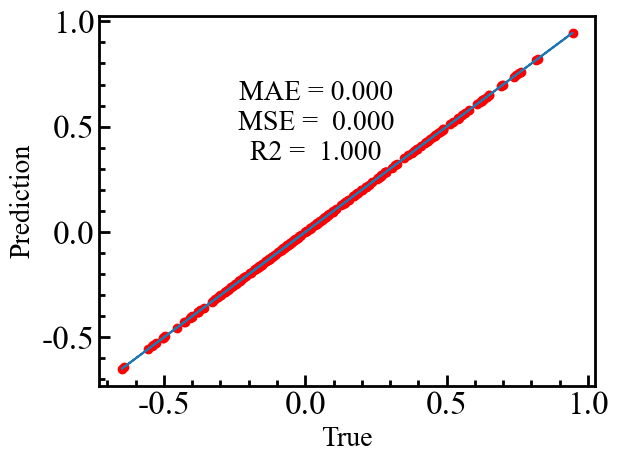

In [18]:
dataML.DecisionTree_default()

## 6.9 LinearRegression建模画图
### 6.9.1 LinearRegression默认建模画图

RMSE: 0.22740140915399992
MAE: 0.16707732409983767
R2: 0.44968705040500434
MSE: 0.05171140088522488


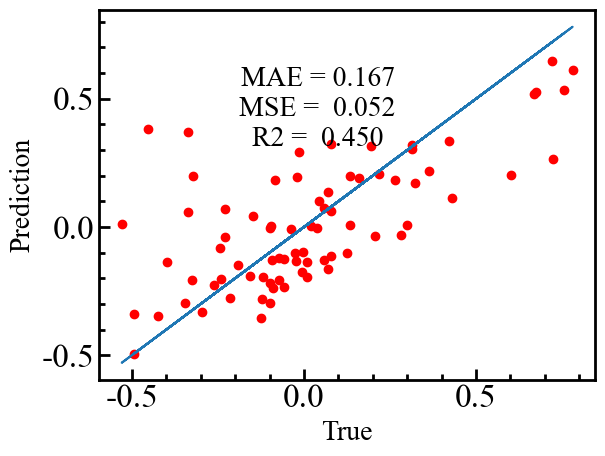

[0.53228149 0.41266385 0.46316967 0.61431356 0.29959096 0.58980169
 0.68344537 0.5648438  0.77114415 0.54167854]


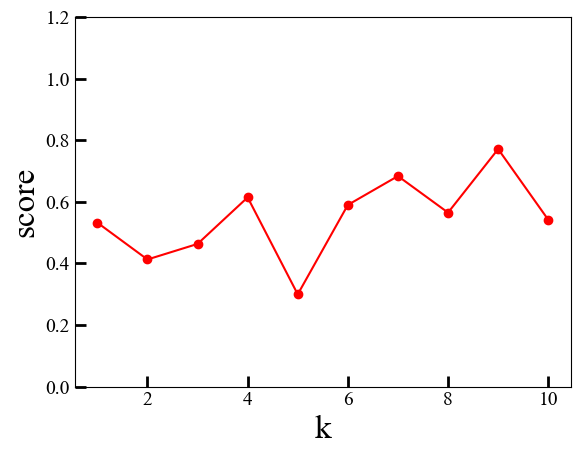

RMSE: 0.19424724721301348
MAE: 0.14574427369298246
R2: 0.6453617620769481
MSE: 0.03773199304983357


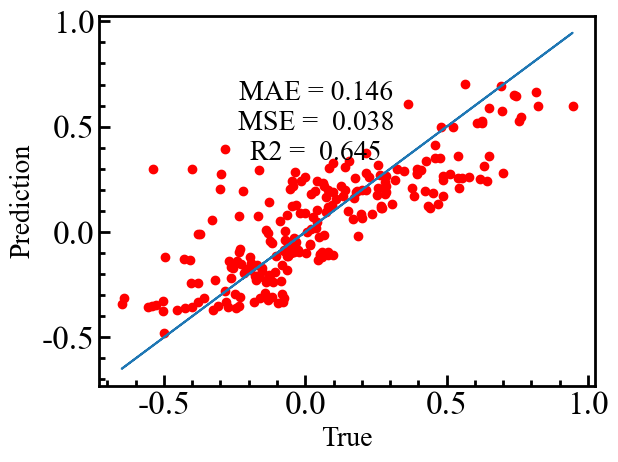

In [19]:
dataML.LinearRegression_default()

In [20]:
## 6.10 Ridge建模画图
### 6.10.1 Ridge默认建模画图

RMSE: 0.23421917543329865
MAE: 0.174887364846797
R2: 0.4161943083315962
MSE: 0.054858622140654324


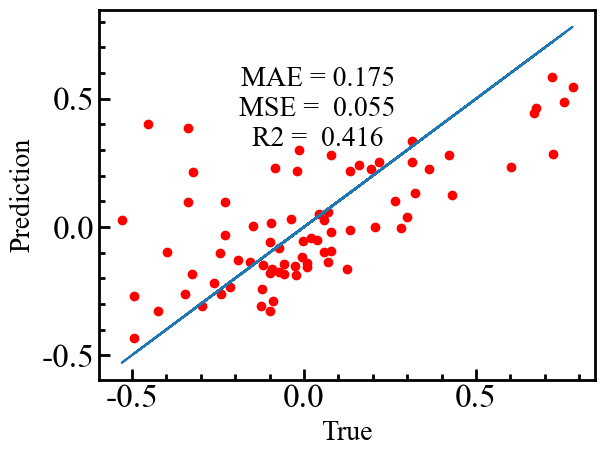

[0.54286296 0.37081874 0.4438159  0.65290416 0.37274697 0.56242884
 0.66570624 0.54548416 0.79235667 0.52472201]


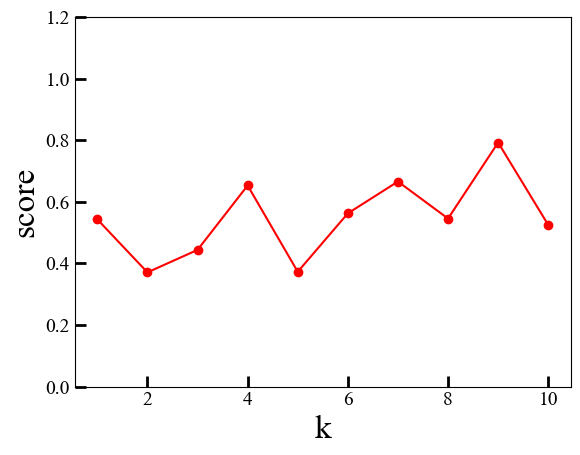

RMSE: 0.19943626510949003
MAE: 0.15232715985776304
R2: 0.6261614534387442
MSE: 0.03977482384082279


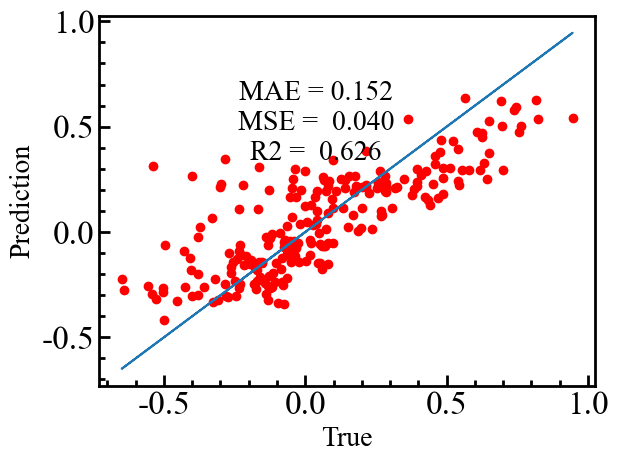

In [21]:
dataML.Ridge_default()

## 6.11 MLP建模画图
### 6.11.1 MLP默认建模画图

RMSE: 0.22395838701681595
MAE: 0.154415298422788
R2: 0.4662251695746772
MSE: 0.05015735911517391


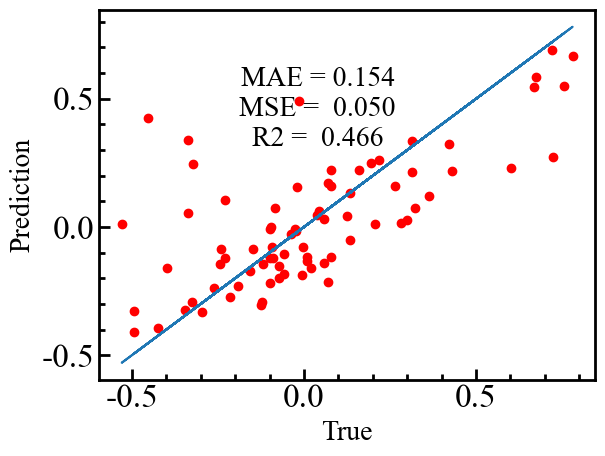

[0.56668362 0.06969918 0.41780568 0.64225635 0.28256718 0.46622565
 0.75864306 0.49042159 0.79517605 0.44755509]


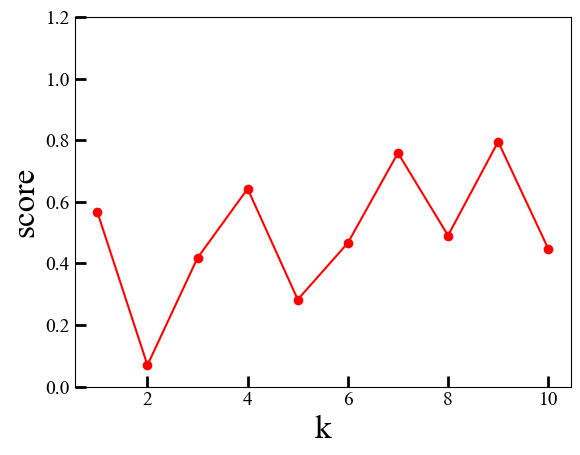

RMSE: 0.1729435723305996
MAE: 0.1251968392605259
R2: 0.7188845818351548
MSE: 0.02990947921046933


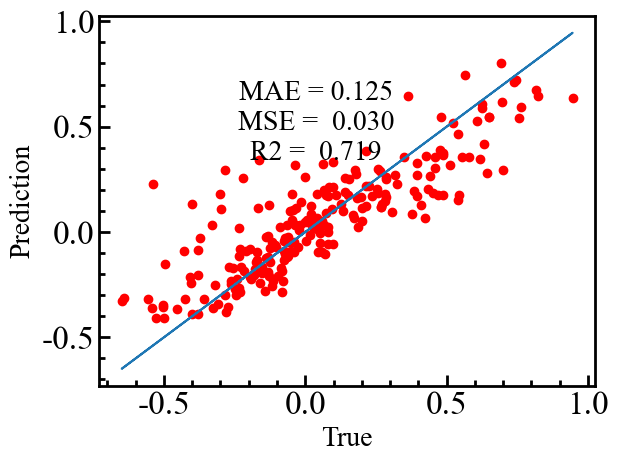

In [22]:
dataML.MLP_default()

### 6.11.2 MLP_modify手动修改超参数建模画图

RMSE: 0.25228610713527816
MAE: 0.1872318074520965
R2: 0.3226547333236074
MSE: 0.06364827985347304


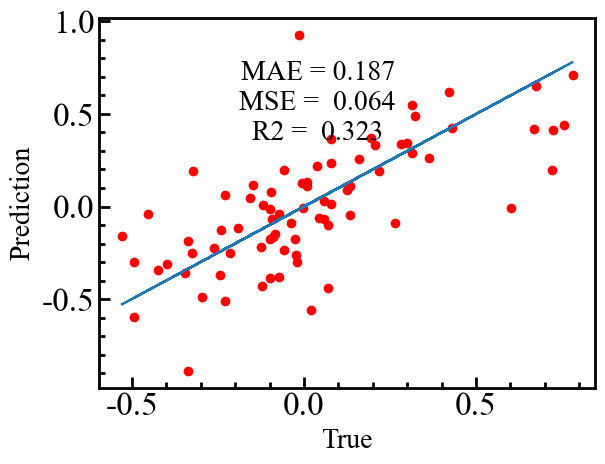

In [ ]:
dataML.MLP_modify(0.01,0.0001,200000,200,200)
# #   MLPRegressor(solver='lbfgs', activation='relu', learning_rate_init=0.01, alpha=0.0001, max_iter=200000, hidden_layer_sizes=(200, 200))

比较上述算法，选取最准确的机器学习模型

# 7. 简单的预测集建立

In [27]:
dataML.xgboost_modify_predict(1000,200,0.2,0,0.9,0.8,0.2,'x_New.csv') #仍为以前的参数，x_New.csv为新的需要预测数据集（不包含output）
# 目前只有 xgboost_modify

new features dataset:            0         1         2         3         4         5         6  \
0 -1.175328 -0.161108 -3.745942 -0.321212 -0.282200 -0.086935 -0.412472   
1 -0.881658 -0.065658 -0.235783 -1.771288  0.070207 -0.902117 -0.344625   
2  1.849925 -0.730325 -0.640299  1.007572 -0.052255 -0.013523 -1.390677   
3  0.649963  0.018096 -1.847483 -0.212325 -1.173959  0.016976 -0.789440   
4  0.060732 -1.871654  0.737515 -0.589024 -2.614177  0.435844  1.123998   

          7         8         9  ...        13        14        15        16  \
0 -0.048654 -1.245132 -1.364781  ...  1.668454  0.712043 -1.105737  1.044652   
1  0.240097 -1.136606 -0.520027  ... -0.864585 -1.832277  0.046192 -0.458767   
2  0.089617  1.437003 -0.350448  ...  0.176062 -0.796953 -1.513023 -0.894258   
3 -0.678659  0.216661  0.086193  ... -0.940643  1.332236  0.360422  0.648495   
4  1.030371 -1.785119  0.005520  ... -0.218939 -0.519476 -0.540805 -1.177905   

         17        18        19        20    

这里生成了新的预测数据集New_prediction_total.csv，最右边一列为output，需要去实验验证或DFT模拟验证！

# 8 描述符导入 
## 8.1 有机分子描述符导入（NJmatML提供了pydel描述符和rdkit描述符）
### 8.1.1  pydel描述符

In [34]:
!pip install padelpy
from padelpy import from_smiles
# calculate molecular descriptors for propane
CCC_descriptors = from_smiles('CCC')
print(CCC_descriptors)
print(CCC_descriptors['nAcid'])
print(CCC_descriptors['ALogP'])
print(CCC_descriptors['ALogp2'])

# z.iloc[0,0] = CCC_descriptors['nAcid']

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
{'nAcid': '0', 'ALogP': '-0.1853999999999998', 'ALogp2': '0.034373159999999923', 'AMR': '14.709', 'apol': '10.614344000000001', 'naAromAtom': '0', 'nAromBond': '0', 'nAtom': '11', 'nHeavyAtom': '3', 'nH': '8', 'nB': '0', 'nC': '3', 'nN': '0', 'nO': '0', 'nS': '0', 'nP': '0', 'nF': '0.0', 'nCl': '0.0', 'nBr': '0.0', 'nI': '0.0', 'nX': '0.0', 'ATS0m': '440.92087500000014', 'ATS1m': '385.3849459999999', 'ATS2m': '272.44744900000023', 'ATS3m': '84.835296', 'ATS4m': '9.144576', 'ATS5m': '0.0', 'ATS6m': '0.0', 'ATS7m': '0.0', 'ATS8m': '0.0', 'ATS0v': '1519.2206606954308', 'ATS1v': '1764.9267344628088', 'ATS2v': '1788.4692764710278', 'ATS3v': '1061.4246313942745', 'ATS4v': '279.75369987837234', 'ATS5v': '0.0', 'ATS6v': '0.0', 'ATS7v': '0.0', 'ATS8v': '0.0', 'ATS0e': '76.36925999999998', 'ATS1e': '72.02208800000001', 'ATS2e': '125.74608399999998', 'ATS3e': '123.32735999999997', 'ATS4e': '60.46617599999999', 'ATS5e': '0.0', 'ATS6e': '

### 8.1.2 rdkit描述符

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


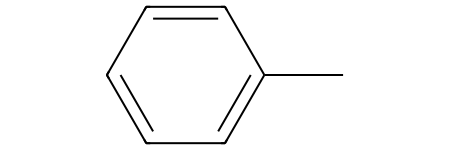

In [36]:
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
m = Chem.MolFromSmiles('Cc1ccccc1')
m
# m = Chem.MolFromMolFile('EthylRed.mol')

## 8.2 无机材料描述符

# 未完待续...（其他机器学习算法，网格搜索，预测集建立，无机和有机描述符填充等等）